<a href="https://colab.research.google.com/github/RXJ74510/Machine-Learning/blob/main/symptoms_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Library

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import csv,numpy as np,pandas as pd
import numpy as np
#from fcmeans import FCM
from matplotlib import pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore") 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Data Read and Data split

In [4]:
data = pd.read_csv ('/content/drive/MyDrive/ML_Project/Testing.csv')
df = pd.DataFrame(data)
cols = df.columns
cols = cols[:-1]
x = df[cols]
y = df['prognosis']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Stats

In [6]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.146341,0.170732,0.024390,0.048780,0.024390,0.170732,0.146341,0.048780,0.048780,0.024390,...,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390
std,0.357839,0.380949,0.156174,0.218085,0.156174,0.380949,0.357839,0.218085,0.218085,0.156174,...,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Analysis and Visualization

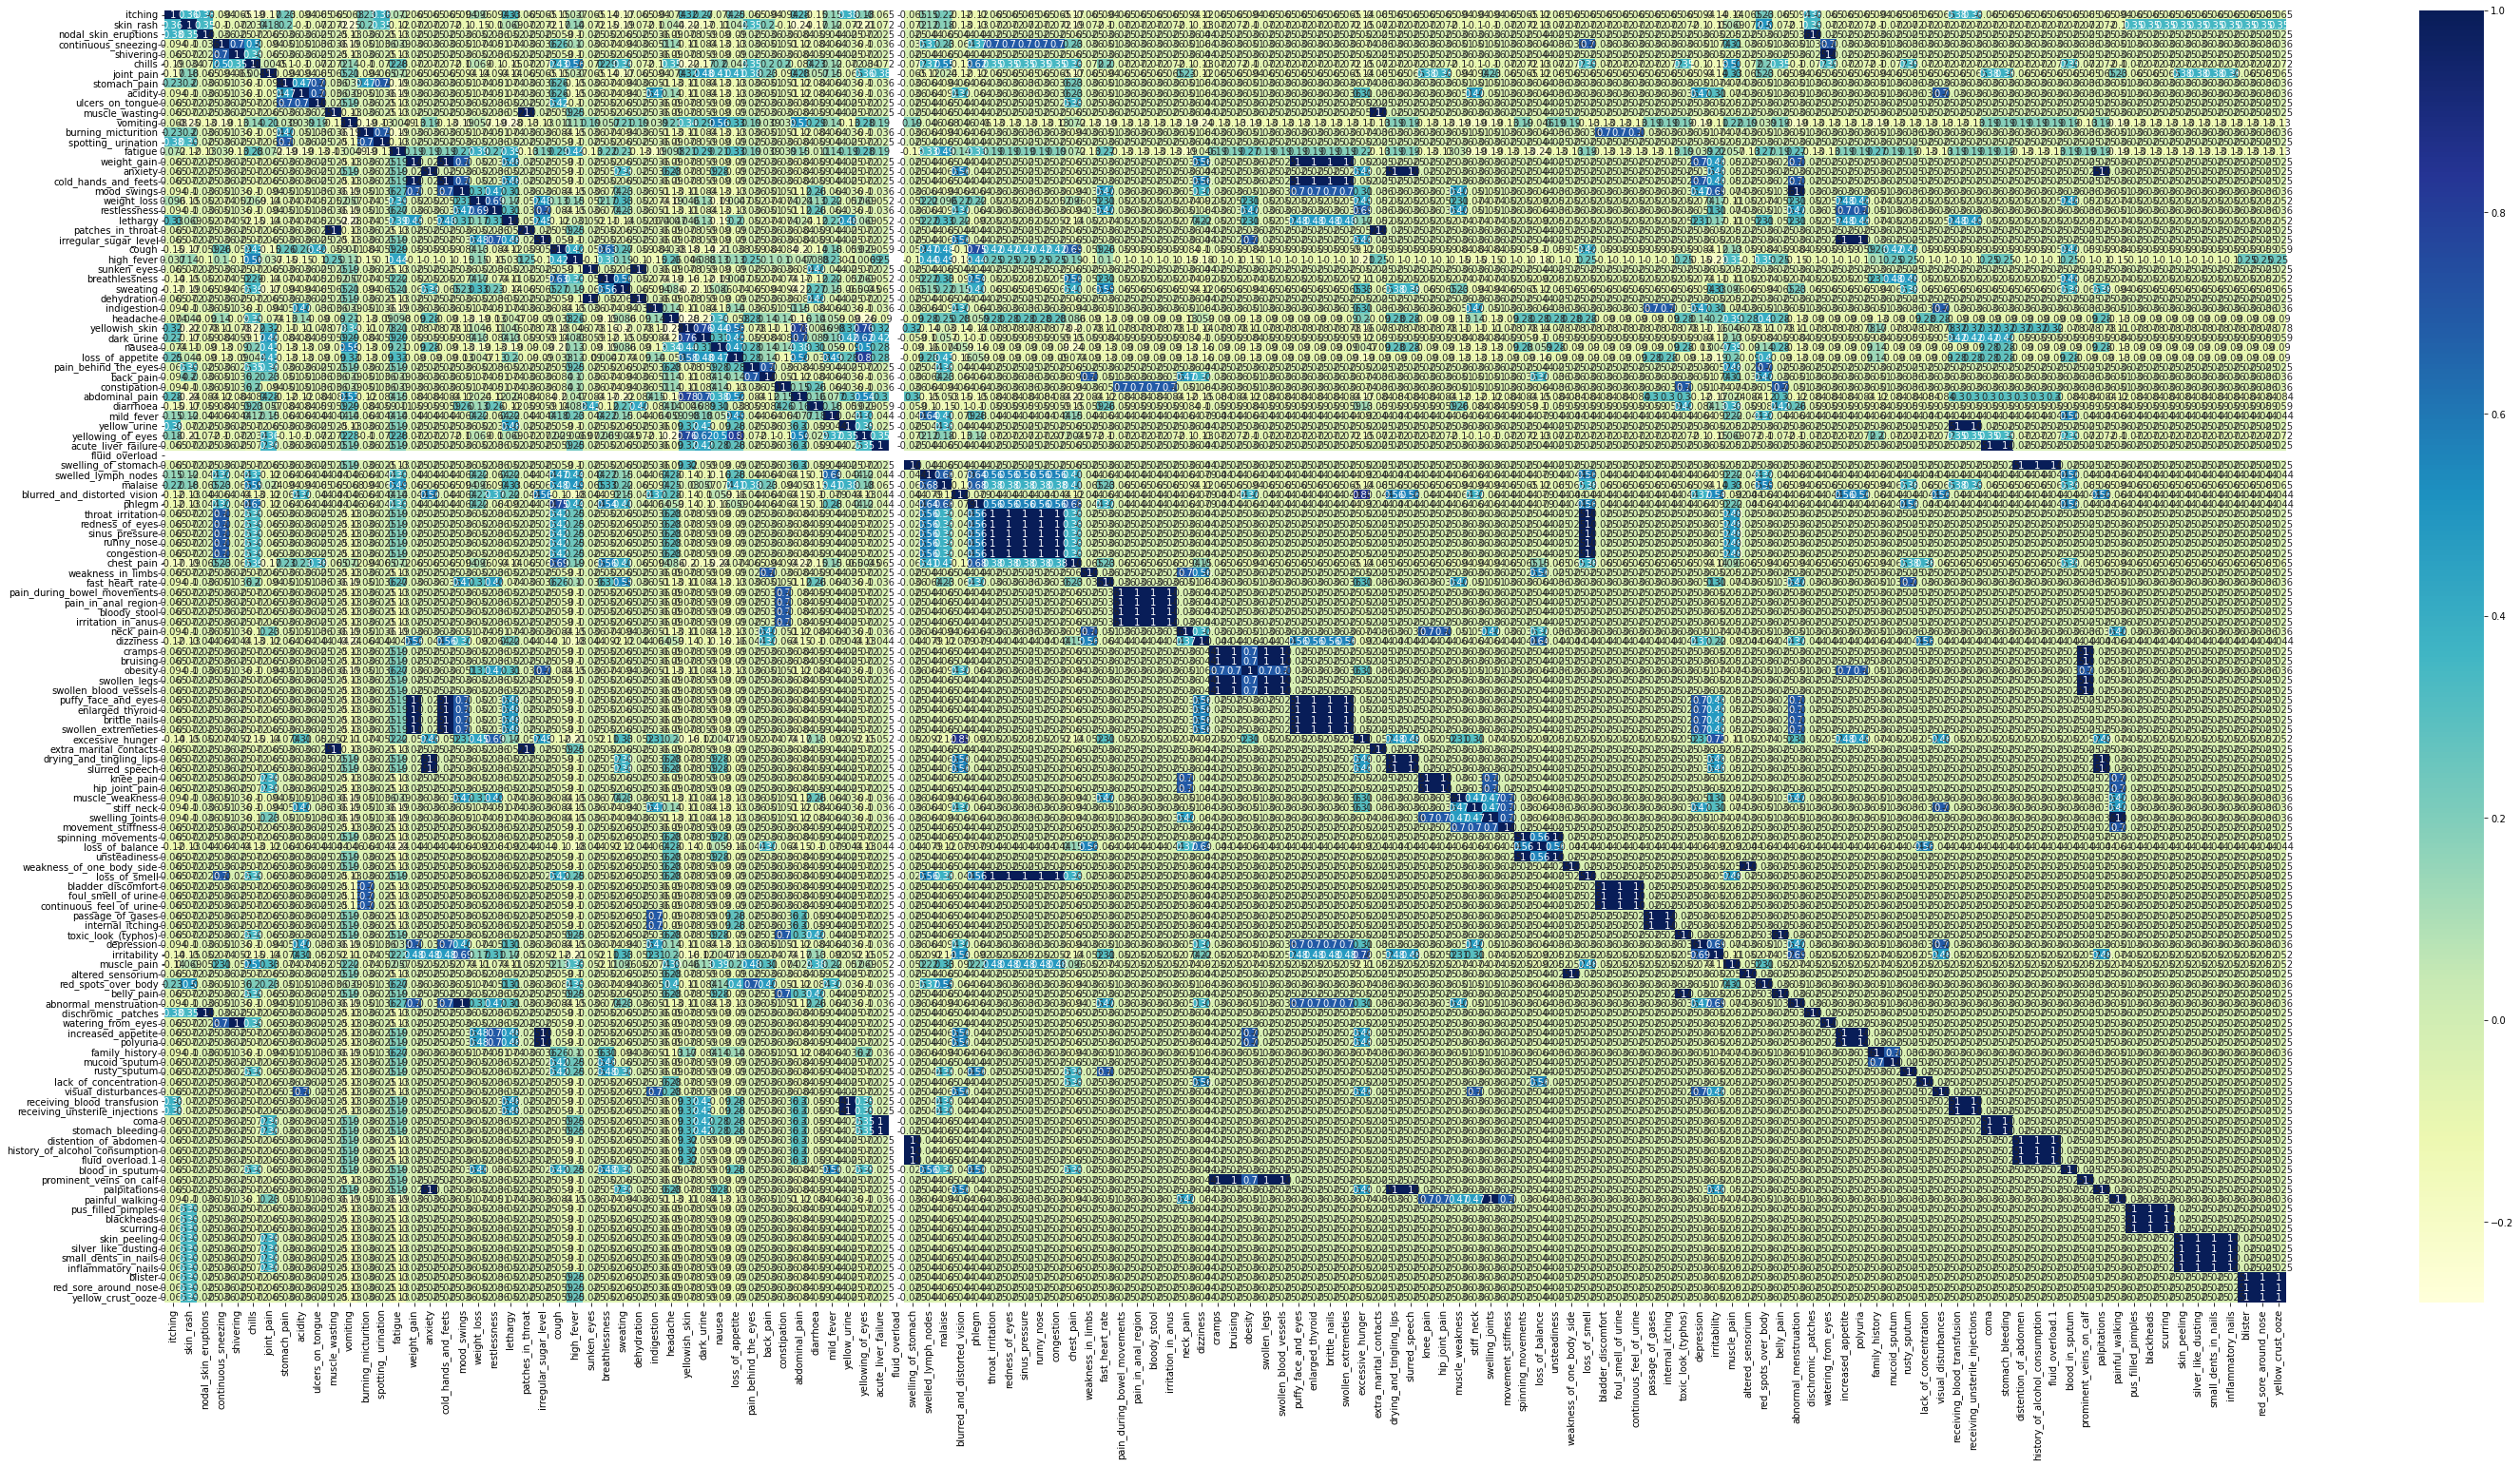

In [7]:
fig, ax = plt.subplots(figsize=(50,25))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [8]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

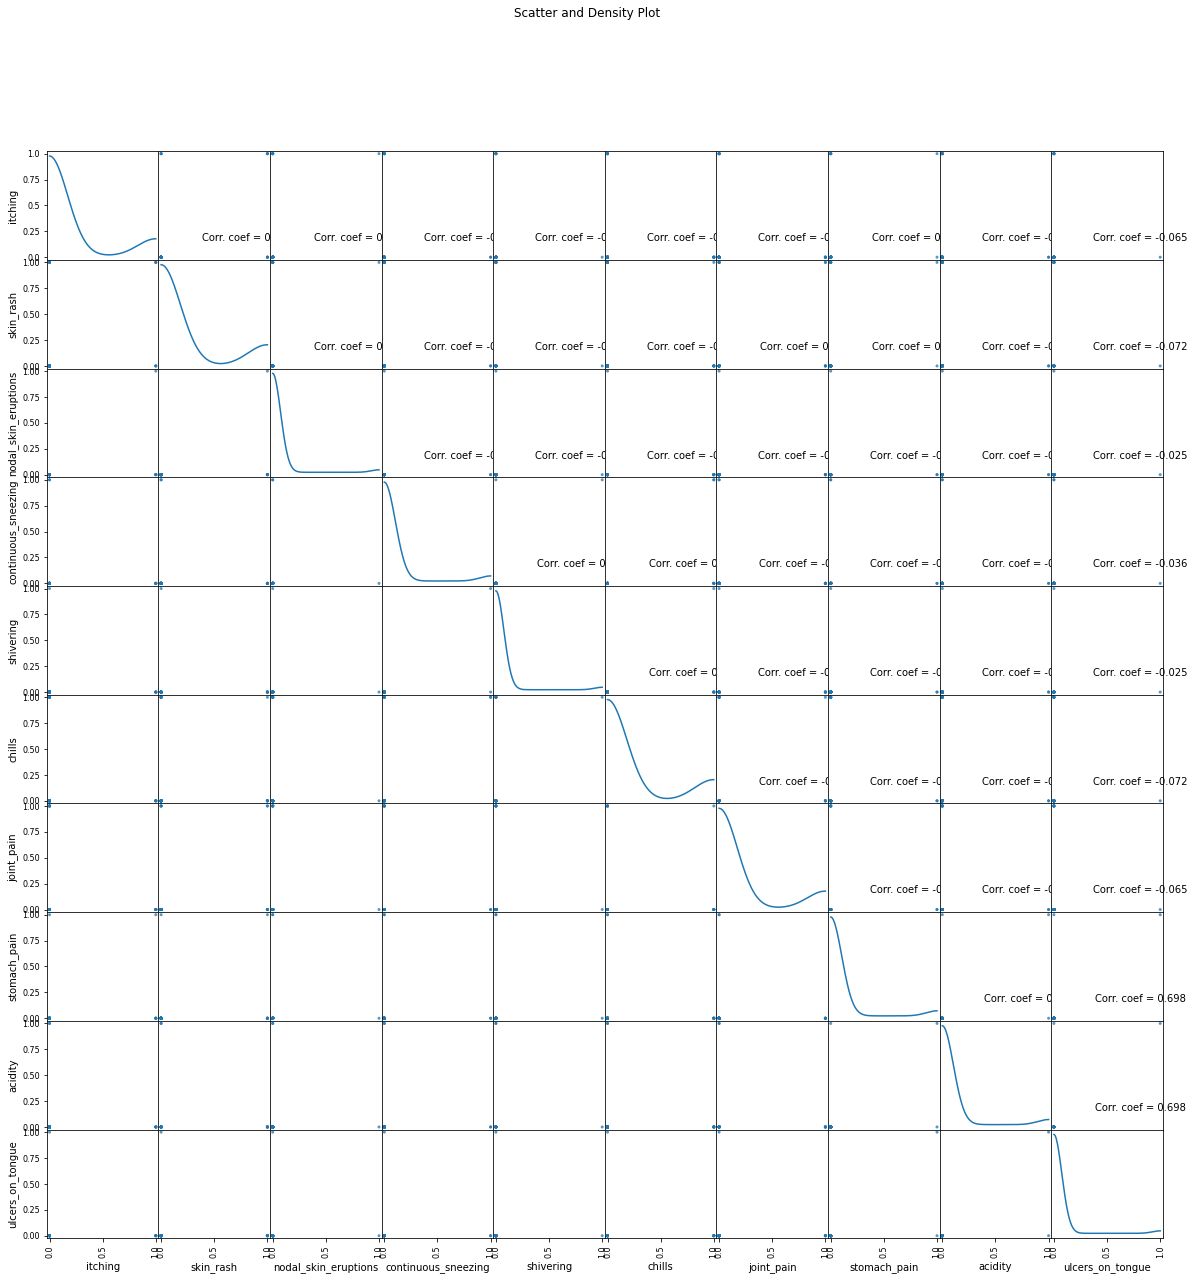

In [9]:
plotScatterMatrix(df, 20, 10)

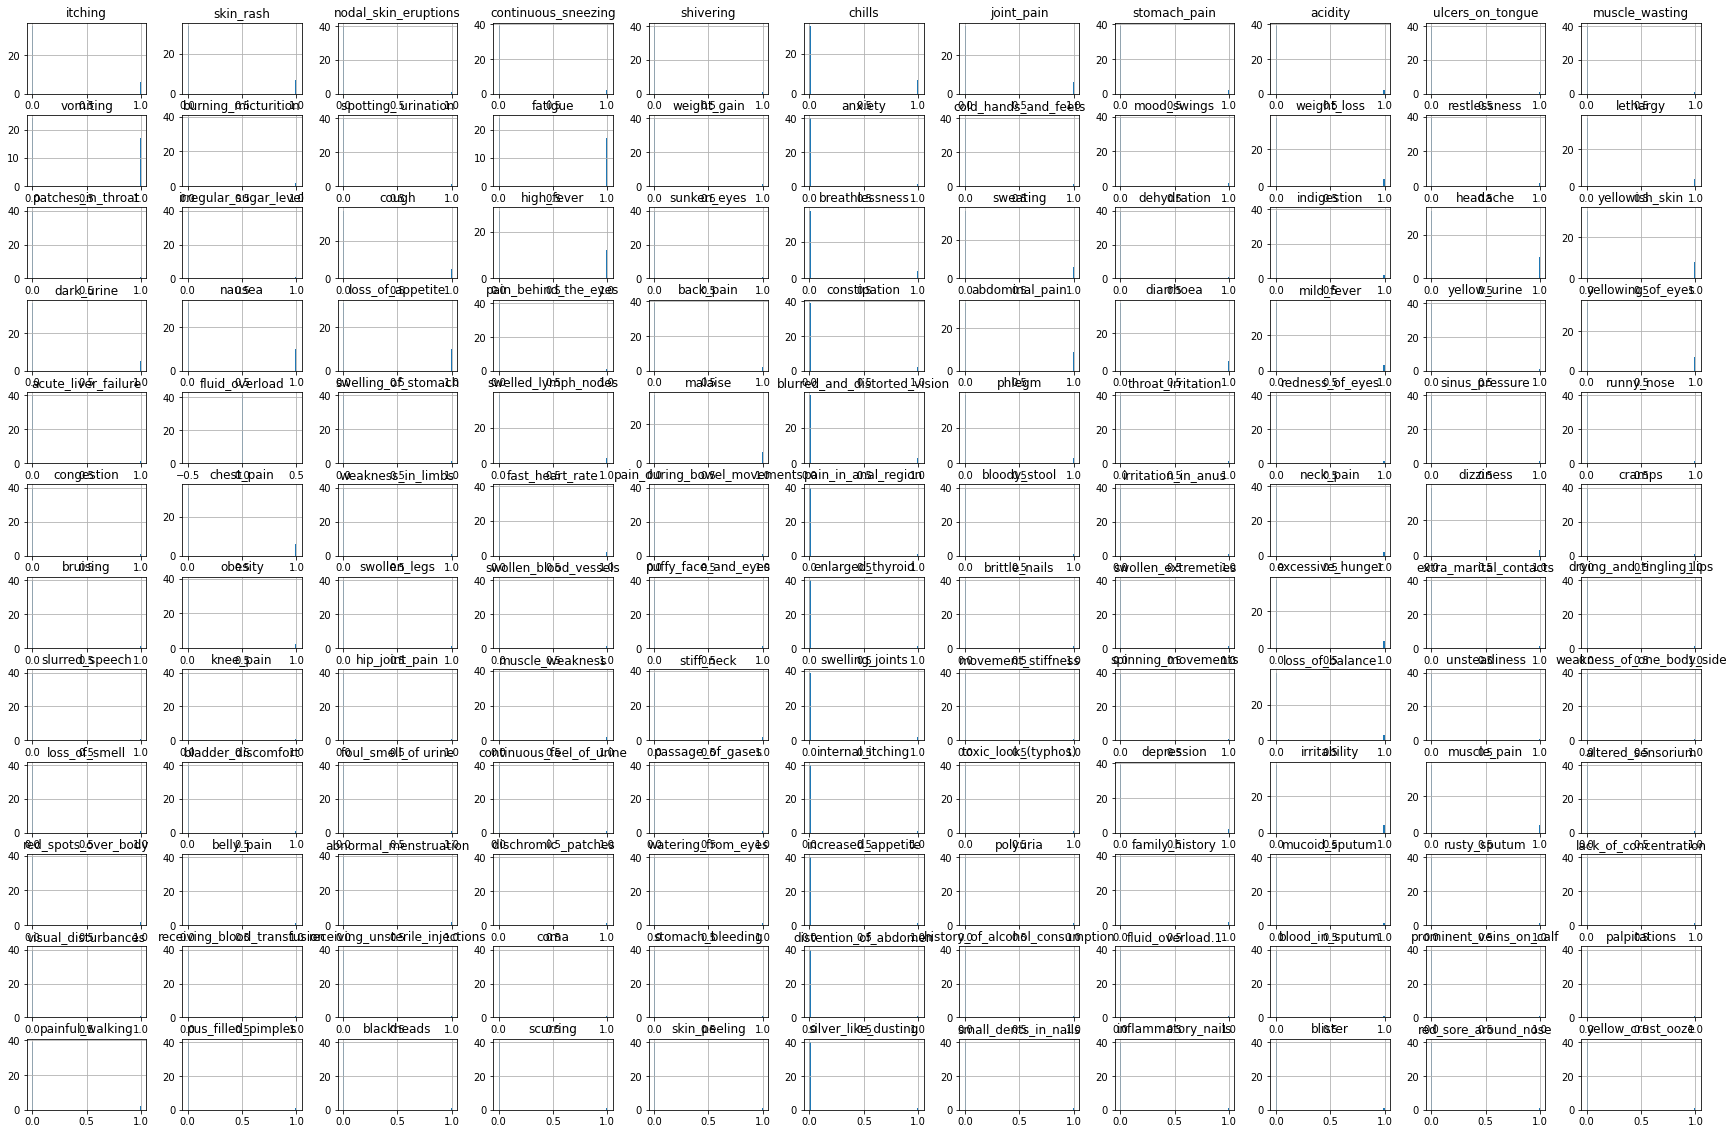

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 20))
df.hist(bins=100, ax=ax1)
plt.show()

# Decision Tree

In [11]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X_train,y_train)
print ("Acurracy: ", clf_dt.score(X_test,y_test))

DecisionTree
Acurracy:  0.0


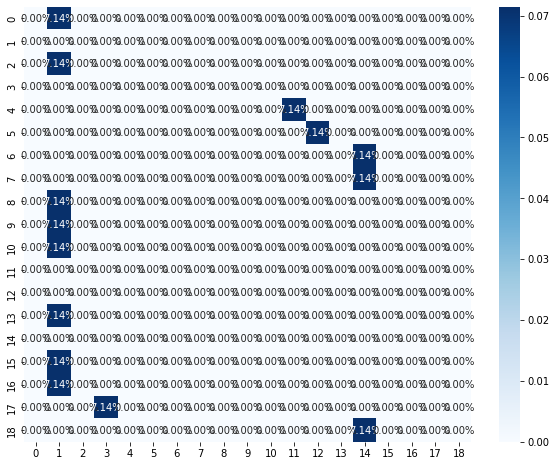

In [12]:
#Predict the response for test dataset
y_pred = clf_dt.predict(X_test)
# Confusion matrix
cf=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')

In [13]:
print("Classification report")
print(classification_report(y_test, y_pred))

Classification report
                              precision    recall  f1-score   support

                        AIDS       0.00      0.00      0.00       1.0
                        Acne       0.00      0.00      0.00       0.0
         Alcoholic hepatitis       0.00      0.00      0.00       1.0
                     Allergy       0.00      0.00      0.00       0.0
            Bronchial Asthma       0.00      0.00      0.00       1.0
        Cervical spondylosis       0.00      0.00      0.00       1.0
                 Common Cold       0.00      0.00      0.00       1.0
                      Dengue       0.00      0.00      0.00       1.0
               Drug Reaction       0.00      0.00      0.00       1.0
             Gastroenteritis       0.00      0.00      0.00       1.0
                Heart attack       0.00      0.00      0.00       1.0
                 Hepatitis C       0.00      0.00      0.00       0.0
               Hypertension        0.00      0.00      0.00       0

# Fuzzy-c-means

In [14]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [15]:
from fcmeans import FCM

Fuzzy cmeans
[1]


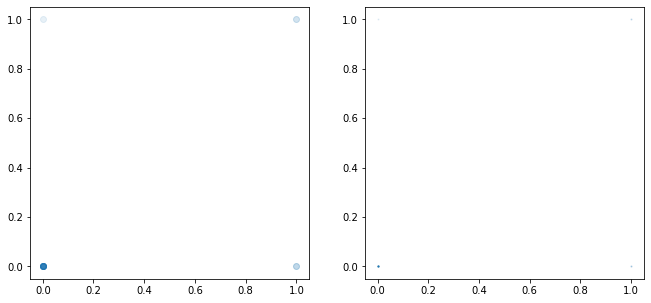

In [17]:
with open('/content/drive/MyDrive/ML_Project/Testing.csv', newline='') as f:
        reader = csv.reader(f)
        symptoms = next(reader)
        symptoms = symptoms[:len(symptoms)-1]

indices = [i for i in range(132)]
symptoms = df.columns.values[:-1]

dictionary = dict(zip(symptoms,indices))

print("Fuzzy cmeans")
#print ("Acurracy: ", fcm.score(fcm_labels))
fcm = FCM(n_clusters=5)
X=np.array(X_train)
Y=np.array(X_test)
fcm.fit(X)
# outputs
fcm_centers = fcm.centers
print(fcm.predict(Y[0]))
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], fcm.predict(Y[0]), alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()



# Testing 

In [18]:
def check(symptom):
    user_input_symptoms = symptom
    user_input_label = [0 for i in range(132)]
    for i in user_input_symptoms:
        idx = dictionary[i]
        user_input_label[idx] = 1

    user_input_label = np.array(user_input_label)
    user_input_label = user_input_label.reshape((-1,1)).transpose()
    return(dt.predict(user_input_label))

print(check(['headache','muscle_weakness','puffy_face_and_eyes','mild_fever','skin_rash']))
prediction = []
for i in range(7):
    pred = check(['headache'])
    prediction.append(pred)
print(prediction)

['Acne']
[array(['Acne'], dtype=object), array(['Acne'], dtype=object), array(['Acne'], dtype=object), array(['Acne'], dtype=object), array(['Acne'], dtype=object), array(['Acne'], dtype=object), array(['Acne'], dtype=object)]


[[-2.07592267 -1.89277648]
 [-0.85913468 -3.2288906 ]
 [-3.57727636 -1.84953179]
 ...
 [ 2.13273892  1.57641472]
 [ 2.76461262  2.35267584]
 [ 0.90925184  1.77039043]]


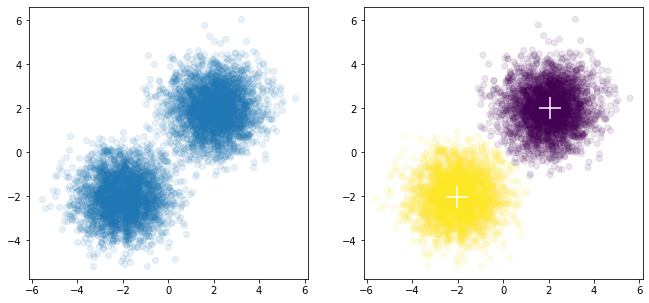

In [19]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))

print(X)
fcm = FCM(n_clusters=2)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.savefig('basic-clustering-output.jpg')
plt.show()

# K Means

In [20]:
from sklearn.cluster import KMeans

# Clustering

In [25]:
kmeans = KMeans(5)
kmeans.fit(x)

KMeans(n_clusters=5)

# Clustering Results

In [22]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 1, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 1, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [23]:
x.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [27]:
data_with_clusters['Clusters']

NameError: ignored

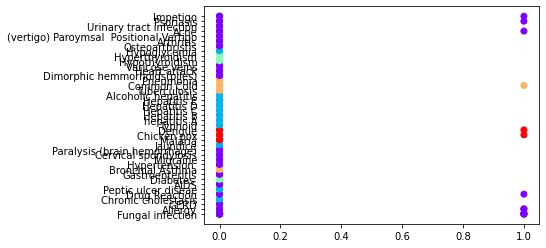

In [28]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(x['itching'],x['shivering'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.scatter(x['skin_rash'],y,c=data_with_clusters['Clusters'],cmap='rainbow')
plt.scatter(x['nodal_skin_eruptions'],y,c=data_with_clusters['Clusters'],cmap='rainbow')
plt.scatter(x['continuous_sneezing'],y,c=data_with_clusters['Clusters'],cmap='rainbow')
plt.scatter(x['shivering'],y,c=data_with_clusters['Clusters'],cmap='rainbow')

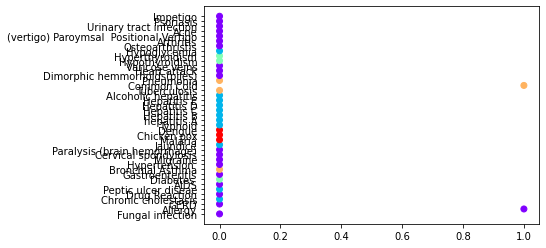

In [29]:
plt.scatter(x['continuous_sneezing'],y,c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

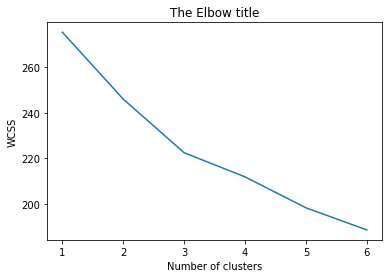

In [30]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')